# Paradigmas de Linguagens de Programação para Ciência de Dados

## Exercício de Aprofundamento - Trilha 4 - Exploratory Data Analysis

O presente notebook pode ser acessado diretamente no Colab através deste [link](https://colab.research.google.com/drive/1xnBpjYfhOx99nXF1aVCtSXJMvULOUjS1?usp=sharing).


# Introdução

A técnica de Análise Exploratrória de Dados consiste em examinar os dados para se obter um entendimento básico desses dados e das relações existentes entre as variáveis analisadas.

Conforme indicado na presente atividade, utilizamos os dados disponibilizados no [GapMinder](https://www.gapminder.org/) e no [WID](https://wid.world/data/).

Para os dados do GapMinder, selecionamos os indicadores:
  *   **Índice De Desigualdade (GINI)**

> Mede o grau de concentração de renda em determinado grupo. Ele aponta a diferença entre os rendimentos dos mais pobres e dos mais ricos.
Numericamente, varia de zero a cem, onde o valor zero representa a situação de igualdade, ou seja, todos têm a mesma renda. O valor cem está no extremo oposto, de modo que uma só pessoa detém toda a riqueza.

  *   **Índice De Educação (OWID)**

> Mede a taxa de alfabetização de adultos e a taxa de escolarização. A taxa de alfabetização de adultos dá uma indicação da capacidade de ler e escrever, enquanto a taxa de escolarização dá uma indicação do nível de educação da creche ao ensino de pós-graduação. O valor máximo da pontuação é cem, que corresponde à educação perfeita a ser alcançada.


Já nos dados do WID, selecionamos os indicadores de:

  *   **Concentração da Renda Nacional dos 10% mais ricos**

> Calcula a porcentagem da concentração da renda dos 10% mais ricos do Brasil.Valores mais próximo de um, indicam que os 10% mais ricos detém maior concentração da renda de todo o país.

  *   **Renda Per Capita**

> A média é obtida através da divisão do Produto Interno Bruto (PIB) pelo número total de habitantes.


Para todos os indicadores escolhidos, optamos por analisar somente os dados do Brasil.


# Implementação

Vamos iniciar a nossa análise!

## Coleta de Dados



### Imports básicos

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#import seaborn as sns 
%matplotlib inline
import urllib.request
import re


### Lendo o DataSet com os dados de Desiguladade

Os arquivos CSV com os índices coletados no GapMiner foram alocados em um repositório do Github.

Vamos acessar os arquivos pela sua URL com a biblioteca urlopen e armazenar o conteúdo deles em DataFrames do pandas.

In [348]:
url_gini_desigualdade = "https://raw.githubusercontent.com/o-eduardo/Data-Science/main/AnaliseExploratoria_RelacaoEducacaoDesigualdade/gini.csv"
df_desigualdade = pd.read_csv(url_gini_desigualdade)
df_desigualdade.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.1,56.9,56.8,56.6,56.4,56.1,55.9,55.7,55.4,55.1,54.7,54.4,54.1,53.7,53.4,53.1,52.7,52.4,52.1,51.7,51.4,...,51.3,50.6,49.7,48.5,47.3,46.2,45.0,44.1,43.4,42.9,42.7,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6
2,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,30.7,31.0,31.1,31.0,30.7,30.4,30.2,30.0,29.7,29.5,29.3,29.1,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,United Arab Emirates,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0


### Preparação dos Dados

Neste trabalho, iremos analisar os dados de Desigualdade e Escolaridade do Brasil. Como o GapMiner apresenta os índices de diversos países no data set, precisamos separar os dados do Brasil e depois iremos unir os dados para fazer nossa analise. 

In [349]:
df_desigualdade_br = df_desigualdade[df_desigualdade.country == 'Brazil'] 
df_desigualdade_br.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
23,Brazil,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.9,37.8,37.7,37.5,37.4,37.2,37.0,36.8,36.6,36.4,36.1,35.9,35.6,35.3,35.0,34.8,34.5,34.2,33.9,33.7,33.4,33.1,...,58.4,57.9,57.4,56.8,56.2,55.5,54.9,54.3,53.8,53.3,53.1,52.6,52.2,51.9,51.6,51.4,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3


Transformando as colunas da série temporal em linhas

In [350]:
df_idesigualdade_br = pd.melt(df_desigualdade_br, id_vars=['country'])
df_idesigualdade_br.head()

,country,variable,value
0,Brazil,1799,37.9
1,Brazil,1800,37.9
2,Brazil,1801,37.9
3,Brazil,1802,37.9
4,Brazil,1803,37.9


Ajustando os nomes das colunas

In [351]:
df_idesigualdade_br = df_idesigualdade_br.rename(columns={'variable':'year',
                                                          'value':'gini_index'})
df_idesigualdade_br.head()

,country,year,gini_index
0,Brazil,1799,37.9
1,Brazil,1800,37.9
2,Brazil,1801,37.9
3,Brazil,1802,37.9
4,Brazil,1803,37.9


### Lendo o DataSet com os dados de Educação

Os arquivos CSV com os índices coletados no GapMiner foram alocados em um repositório do Github.

Vamos acessar os arquivos pela sua URL com a biblioteca urlopen e armazenar o conteúdo deles em DataFrames do pandas.

In [352]:
url_owid_educaocao = "https://raw.githubusercontent.com/o-eduardo/Data-Science/main/AnaliseExploratoria_RelacaoEducacaoDesigualdade/owid_education_idx.csv"
df_educacao = pd.read_csv(url_owid_educaocao)
df_educacao.head()

,country,1869,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.0667,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,...,NaN,NaN,5.2,NaN,NaN,NaN,NaN,7.73,NaN,NaN,NaN,NaN,9.93,10.7,10.7,11.3,12.0,12.7,12.7,13.3,13.3,14.0,14.7,14.7,15.3,16.0,16.7,17.3,18.0,19.3,20.0,20.7,21.3,22.0,22.7,23.3,23.3,24.0,24.0,25.3
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.3,29.3,29.3,29.3,29.3,29.3,29.3,30.0,30.0,30.7,31.3,31.3,31.3,32.0,32.7,32.7,33.3,34.0,34.0
2,Albania,0.1330,0.1330,NaN,NaN,NaN,NaN,0.1330,NaN,NaN,NaN,NaN,0.2000,NaN,NaN,NaN,NaN,0.2670,NaN,NaN,NaN,NaN,0.2670,NaN,NaN,NaN,NaN,0.4000,NaN,NaN,NaN,NaN,0.4670,NaN,NaN,NaN,NaN,0.6000,NaN,NaN,...,NaN,NaN,33.0,NaN,NaN,NaN,NaN,45.00,NaN,NaN,NaN,NaN,52.20,52.0,52.0,52.0,52.0,53.3,54.7,55.3,56.7,57.3,58.7,58.0,60.0,60.0,60.7,60.7,61.3,61.3,61.3,62.0,62.0,62.0,64.0,64.7,64.7,64.7,66.7,66.7
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.7,47.3,50.7,67.3,70.0,65.3,67.3,67.3,67.3,67.3,67.3,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.9,NaN,NaN,NaN,NaN,29.80,NaN,NaN,NaN,NaN,37.50,39.3,41.3,43.3,45.3,47.3,48.7,50.7,52.0,53.3,55.3,56.0,57.3,58.0,59.3,60.7,62.0,62.7,64.0,64.7,66.0,66.7,68.0,68.7,70.0,70.7,72.0,72.0


### Preparação dos Dados

Neste trabalho, iremos analisar os dados de Desigualdade e Escolaridade do Brasil. Como o GapMiner apresenta os índices de diversos países no data set, precisamos separar os dados do Brasil e depois iremos unir os dados para fazer nossa analise. 

In [353]:
df_educacao_br = df_educacao[df_educacao.country == 'Brazil'] 
df_educacao_br.head()

,country,1869,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
23,Brazil,0.667,0.8,NaN,NaN,NaN,NaN,1.07,NaN,NaN,NaN,NaN,1.33,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,1.93,NaN,NaN,NaN,NaN,3.13,NaN,NaN,NaN,NaN,4.07,NaN,NaN,NaN,NaN,5.4,NaN,NaN,...,NaN,NaN,19.5,NaN,NaN,NaN,NaN,23.9,NaN,NaN,NaN,NaN,26.9,26.0,27.3,28.7,30.0,30.7,32.0,33.3,34.7,36.0,37.3,38.7,40.0,41.3,41.3,42.0,42.7,43.3,44.7,45.3,46.0,47.3,48.7,49.3,49.3,50.7,52.0,52.0


Transformando as colunas da série temporal em linhas

In [354]:
df_ieducacao_br = pd.melt(df_educacao_br, id_vars=['country'])
df_ieducacao_br.head()

,country,variable,value
0,Brazil,1869,0.667
1,Brazil,1874,0.800
2,Brazil,1875,NaN
3,Brazil,1876,NaN
4,Brazil,1877,NaN


Ajustando os nomes das colunas

In [355]:
df_ieducacao_br = df_ieducacao_br.rename(columns={'variable':'year',
                                                  'value':'owid_education_index'})
df_ieducacao_br.head()

,country,year,owid_education_index
0,Brazil,1869,0.667
1,Brazil,1874,0.800
2,Brazil,1875,NaN
3,Brazil,1876,NaN
4,Brazil,1877,NaN


### Unificando os dois Índices

In [356]:
df_indices_br = pd.merge(df_idesigualdade_br, 
                         df_ieducacao_br, 
                         on=['country','year'])
df_indices_br.head()

,country,year,gini_index,owid_education_index
0,Brazil,1869,31.2,0.667
1,Brazil,1874,30.9,0.800
2,Brazil,1875,30.7,NaN
3,Brazil,1876,30.6,NaN
4,Brazil,1877,30.5,NaN


### Lendo o DataSet com os dados de Concentração de Renda e Renda Per Caapita

Os arquivos XLS com os índices coletados no WID foram alocados em um repositório do Github.

Vamos acessar os arquivos pela sua URL com a biblioteca urlopen e armazenar o conteúdo deles em DataFrames do pandas.

In [357]:
url_wid = "https://github.com/o-eduardo/Data-Science/blob/main/AnaliseExploratoria_RelacaoEducacaoDesigualdade/WID_Data_PIB_Renda10percent.xls?raw=true"
df_wid = pd.read_excel(url_wid, header=None)
df_wid.head()

,0,1,2,3,4
0,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1950,5640.7720
1,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1951,5757.5249
2,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1952,5940.6765
3,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1953,6067.0429
4,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1954,6300.8140


Ajustando o header da tabela com os nomes das colunas

In [358]:
df_wid.columns = ['country', 'ind_description',  'ind_code', 'year', 'value']
df_wid.year = df_wid.year.astype(str)
df_wid.head()
        

,country,ind_description,ind_code,year,value
0,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1950,5640.7720
1,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1951,5757.5249
2,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1952,5940.6765
3,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1953,6067.0429
4,Brasil,agdpro_pall_992_i_BR\nProduto Interno Bruto\nP...,mortalha,1954,6300.8140


Separando os indicadores em dataFrame separados por código do indicador

In [359]:
df_wid_pib = df_wid[df_wid.ind_code == 'mortalha'][['country', 'year', 'value']]
df_wid_perc_renda_dez = df_wid[df_wid.ind_code == 'p90p100'][['country', 'year', 'value']]

In [360]:
df_wid_pib.head()

,country,year,value
0,Brasil,1950,5640.7720
1,Brasil,1951,5757.5249
2,Brasil,1952,5940.6765
3,Brasil,1953,6067.0429
4,Brasil,1954,6300.8140


In [361]:
df_wid_perc_renda_dez.head()

,country,year,value
70,Brasil,1950,NaN
71,Brasil,1951,NaN
72,Brasil,1952,NaN
73,Brasil,1953,NaN
74,Brasil,1954,NaN


### Unificando o dataframe de renda per capita e ajustando os nomes das colunas para os respectivos indicadores

In [362]:
df_indices_br = pd.merge(df_indices_br, 
                         df_wid_pib.drop(columns=['country']), 
                         on=['year'])

df_indices_br = df_indices_br.rename(columns={'value':'gpd_per_capita'})
df_indices_br.head()

,country,year,gini_index,owid_education_index,gpd_per_capita
0,Brazil,1950,40.6,NaN,5640.7720
1,Brazil,1951,40.8,NaN,5757.5249
2,Brazil,1952,41.1,NaN,5940.6765
3,Brazil,1953,41.4,NaN,6067.0429
4,Brazil,1954,41.9,14.5,6300.8140


### Unificando o dataframe de concentração de renda e ajustando os nomes das colunas para os respectivos indicadores

In [363]:
df_indices_br = pd.merge(df_indices_br, 
                         df_wid_perc_renda_dez.drop(columns=['country']), 
                         on=['year'])
df_indices_br = df_indices_br.rename(columns={'value':'gpd_perc10'})
df_indices_br.head()

,country,year,gini_index,owid_education_index,gpd_per_capita,gpd_perc10
0,Brazil,1950,40.6,NaN,5640.7720,NaN
1,Brazil,1951,40.8,NaN,5757.5249,NaN
2,Brazil,1952,41.1,NaN,5940.6765,NaN
3,Brazil,1953,41.4,NaN,6067.0429,NaN
4,Brazil,1954,41.9,14.5,6300.8140,NaN


Agora temos o dataFrame com os quatro indicadores

In [364]:
df_indices_br.head()

,country,year,gini_index,owid_education_index,gpd_per_capita,gpd_perc10
0,Brazil,1950,40.6,NaN,5640.7720,NaN
1,Brazil,1951,40.8,NaN,5757.5249,NaN
2,Brazil,1952,41.1,NaN,5940.6765,NaN
3,Brazil,1953,41.4,NaN,6067.0429,NaN
4,Brazil,1954,41.9,14.5,6300.8140,NaN


## Exploração Inicial dos Dados


### Tamanho do DataFrame

In [365]:
print(f"Dimensões do DataFrame: {df_indices_br.shape}")


Dimensões do DataFrame: (67, 6)


### Tipos dos Dados

In [259]:
display(df_indices_br.dtypes)

country                  object
year                     object
gini_index              float64
owid_education_index    float64
gpd_per_capita          float64
gpd_perc10              float64
dtype: object

### Detalhes estatisticos do DataFrame

In [366]:
display(df_indices_br.describe())

,gini_index,owid_education_index,gpd_per_capita,gpd_perc10
count,67.000000,35.000000,67.000000,37.000000
mean,52.622388,35.711429,14073.616890,0.571741
std,6.089156,11.301790,4444.043691,0.013342
min,40.600000,14.500000,5640.772000,0.532600
25%,47.600000,27.100000,9111.520250,0.568400
50%,53.800000,37.300000,16290.517300,0.568400
75%,58.050000,45.000000,17143.473550,0.568400
max,60.700000,52.000000,19734.895100,0.600700


### Primeiros registros

In [368]:
df_indices_br.head()

,country,year,gini_index,owid_education_index,gpd_per_capita,gpd_perc10
0,Brazil,1950,40.6,NaN,5640.7720,NaN
1,Brazil,1951,40.8,NaN,5757.5249,NaN
2,Brazil,1952,41.1,NaN,5940.6765,NaN
3,Brazil,1953,41.4,NaN,6067.0429,NaN
4,Brazil,1954,41.9,14.5,6300.8140,NaN


### Intervalo de datas no DataFrame

In [367]:
data_min = int(df_indices_br.year.min())
data_max = int(df_indices_br.year.max())
print(f"Menor Valor de Data: {data_min}")
print(f"Maior Valor de Data: {data_max}")
print(f"Período da Análise: {data_max - data_min} anos")


Menor Valor de Data: 1950
Maior Valor de Data: 2016
Período da Análise: 66 anos


### Valores duplicados

In [264]:
print(f"Soma dos registros duplicados do dataset")
display(df_indices_br.duplicated().sum())
print("\n")

Soma dos registros duplicados do dataset


0

## Qualidade dos Dados

### Porcentagem das Linhas com valores nulos em cada coluna:


In [369]:
print(df_indices_br.isnull().sum() / len(df_indices_br) )

country                 0.000000
year                    0.000000
gini_index              0.000000
owid_education_index    0.477612
gpd_per_capita          0.000000
gpd_perc10              0.447761
dtype: float64


### Removendo as linhas com valores nulos

In [370]:
df_remove = df_indices_br.loc[(df_indices_br.owid_education_index.isnull() == True) ]
df_indices_br = df_indices_br.drop(df_remove.index)
print(df_indices_br.isnull().sum() / len(df_indices_br) )

country                 0.000000
year                    0.000000
gini_index              0.000000
owid_education_index    0.000000
gpd_per_capita          0.000000
gpd_perc10              0.171429
dtype: float64


In [371]:
df_remove = df_indices_br.loc[(df_indices_br.gpd_perc10.isnull() == True) ]
df_indices_br = df_indices_br.drop(df_remove.index)
print(df_indices_br.isnull().sum() / len(df_indices_br) )

country                 0.0
year                    0.0
gini_index              0.0
owid_education_index    0.0
gpd_per_capita          0.0
gpd_perc10              0.0
dtype: float64


## Visualização e Análise dos Dados

### Normalizando os dados, pois queremos analisar dados em escalas diferentes.

In [372]:
df_indices_br_norm = df_indices_br.copy()
lista_indicadores = ['gini_index','owid_education_index',
                     'gpd_per_capita','gpd_perc10']
for indice in df_indices_br_norm[lista_indicadores]:
  v_norm = df_indices_br_norm[indice] / df_indices_br_norm[indice].max()
  df_indices_br_norm[indice] = v_norm
  
df_indices_br_norm.head()

,country,year,gini_index,owid_education_index,gpd_per_capita,gpd_perc10
34,Brazil,1984,0.973244,0.459615,0.808220,0.946229
39,Brazil,1989,0.986622,0.517308,0.874355,0.946229
40,Brazil,1990,0.983278,0.500000,0.825468,0.946229
41,Brazil,1991,0.971572,0.525000,0.816394,0.946229
42,Brazil,1992,0.968227,0.551923,0.792849,0.946229


### A Educação do país esta melhorando? E a desigualdade está diminuindo?

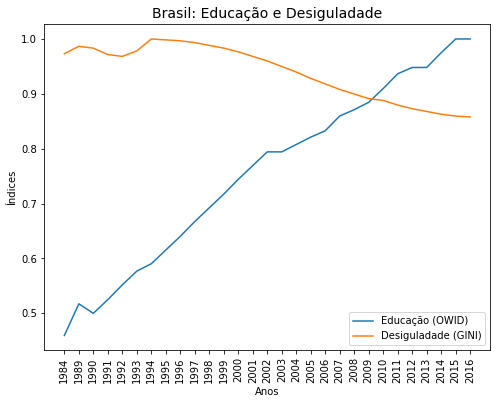

In [387]:
plt.figure(figsize=(8,6))


sns.lineplot(x=df_indices_br.year, y=df_indices_br_norm.owid_education_index, 
             label='Educação (OWID)')
sns.lineplot(x=df_indices_br.year, y=df_indices_br_norm.gini_index, 
             label='Desiguladade (GINI)')


plt.ylabel("Índices")
plt.xlabel("Anos")

plt.title('Brasil: Educação e Desiguladade', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Como os indicadores evoluiram ao longo do tempo no Brasil? 

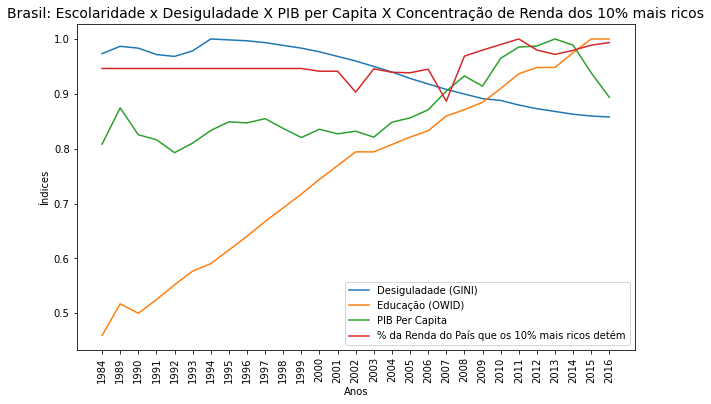

In [389]:
plt.figure(figsize=(10,6))


sns.lineplot(x=df_indices_br_norm.year, 
             y=df_indices_br_norm.gini_index, 
             label='Desiguladade (GINI)')

sns.lineplot(x=df_indices_br_norm.year, 
             y=df_indices_br_norm.owid_education_index, 
             label='Educação (OWID)')

sns.lineplot(x=df_indices_br_norm.year,
             y=df_indices_br_norm.gpd_per_capita,
             label='PIB Per Capita')

sns.lineplot(x=df_indices_br_norm.year,
             y=df_indices_br_norm.gpd_perc10,
             label='% da Renda do País que os 10% mais ricos detém')

plt.ylabel("Índices")
plt.xlabel("Anos")

plt.title('Brasil: Escolaridade x Desiguladade X PIB per Capita X Concentração '
          + 'de Renda dos 10% mais ricos', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Como foi a evolução da Educação e da Renda no Brasil? 


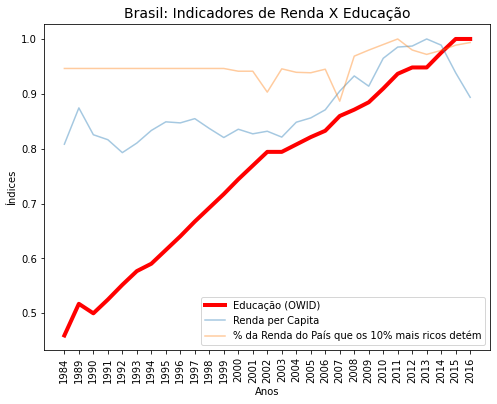

In [390]:
plt.figure(figsize=(8,6))

sns.lineplot(x=df_indices_br_norm.year, 
             y=df_indices_br_norm.owid_education_index, 
             label='Educação (OWID)', linewidth=4, color='r')

sns.lineplot(x=df_indices_br_norm.year, y=df_indices_br_norm.gpd_per_capita, 
             label='Renda per Capita', alpha=0.4)

sns.lineplot(x=df_indices_br_norm.year, y=df_indices_br_norm.gpd_perc10, 
             label='% da Renda do País que os 10% mais ricos detém', alpha=0.4)

plt.ylabel("Índices")
plt.xlabel("Anos")

plt.title('Brasil: Indicadores de Renda X Educação', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Da mesma forma, como evoluiram os indicadores de Renda com o de Desiguladade? 


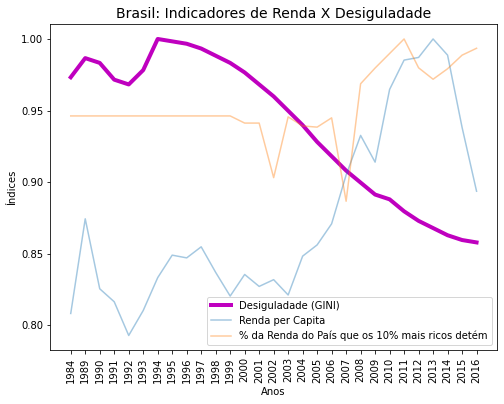

In [391]:
plt.figure(figsize=(8,6))

sns.lineplot(x=df_indices_br_norm.year, y=df_indices_br_norm.gini_index, 
             label='Desiguladade (GINI)', linewidth=4, color='m')

sns.lineplot(x=df_indices_br_norm.year, y=df_indices_br_norm.gpd_per_capita, 
             label='Renda per Capita', alpha=0.4)

sns.lineplot(x=df_indices_br_norm.year, y=df_indices_br_norm.gpd_perc10, 
             label='% da Renda do País que os 10% mais ricos detém', alpha=0.4)

plt.ylabel("Índices")
plt.xlabel("Anos")

plt.title('Brasil: Indicadores de Renda X Desiguladade', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Qual indicador teve maior variação ao longo dos anos? E a menor?

O desvio padrão mostra o quanto os dados estiveram espalhados para longe da média. Valores maiores indicam um maior espalhamento dos dados, e valores menores indicam um menor espalhamento com os dados bem próximos da

Valores das Médias

In [377]:
display(df_indices_br[['gpd_per_capita', 'owid_education_index',
       'gini_index', 'gpd_perc10']].mean())

gpd_per_capita          17263.914655
owid_education_index       39.358621
gini_index                 56.189655
gpd_perc10                  0.572662
dtype: float64

Valores do Desvio-Padrão

In [378]:
display(df_indices_br[['gini_index', 'owid_education_index',
       'gpd_per_capita', 'gpd_perc10']].std().sort_values(ascending=False))

gpd_per_capita          1239.443408
owid_education_index       8.595078
gini_index                 2.972054
gpd_perc10                 0.014993
dtype: float64

### Vamos verificar quais variáveis estão linearmente correlacionadas

Os valores próximos de -1 e próximos de 1 indicam fortes correlações.

> No mapa de Calor: Cores mais escuras indicam uma correlação negativa e cores mais claras indicam uma correlação positiva


In [379]:
# calculo da correlação pelo pandas
display(df_indices_br[['gini_index', 'owid_education_index',
       'gpd_per_capita', 'gpd_perc10']].corr())


,gini_index,owid_education_index,gpd_per_capita,gpd_perc10
gini_index,1.000000,-0.886617,-0.849263,-0.606914
owid_education_index,-0.886617,1.000000,0.779993,0.474230
gpd_per_capita,-0.849263,0.779993,1.000000,0.630162
gpd_perc10,-0.606914,0.474230,0.630162,1.000000


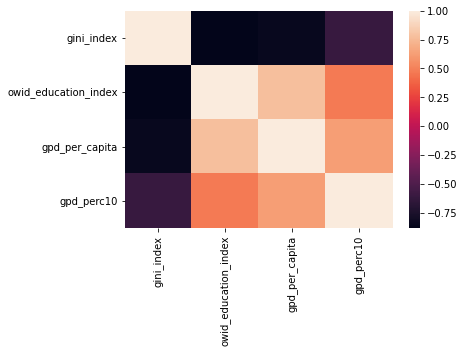

In [380]:
plt.figure(figsize=(6,4))

sns.heatmap(df_indices_br[['gini_index', 'owid_education_index',
       'gpd_per_capita', 'gpd_perc10']].corr())

### Podemos ver a dispersão dos pontos combinando as varíaveis em gráficos separados

**Notamos que o índice de Desiguladade (GINI) teve forte correlação negativa com a Renda Per Capita e com a Educação (OWID)** 

**E também que a Educação (OWID) teve correlação positiva com a Renda Per Capita** 

<Figure size 288x288 with 0 Axes>

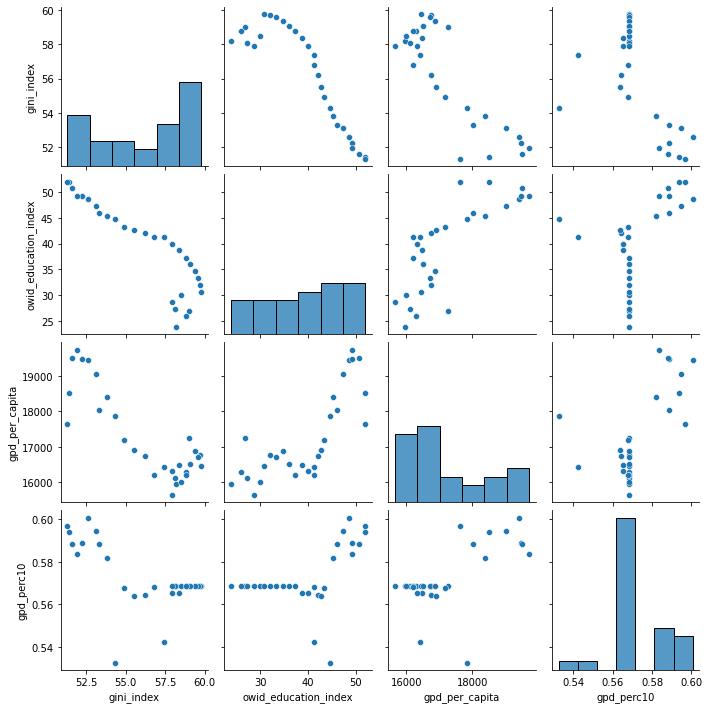

In [381]:
plt.figure(figsize=(4,4))

sns.pairplot(data=df_indices_br)
plt.show()

### Como a Educação esteve relacionada com a Desiguladade?


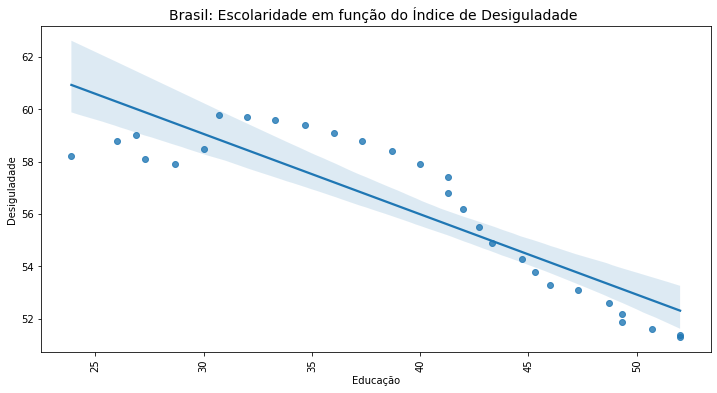

In [392]:
plt.figure(figsize=(12,6))


sns.regplot(x='owid_education_index', y='gini_index', data=df_indices_br)


plt.ylabel("Desiguladade")
plt.xlabel("Educação")

plt.title("Brasil: Escolaridade em função do Índice de Desiguladade ", fontsize=14)
plt.xticks(rotation=90)
plt.show()

### Como a Desiguladade afetou a Renda Per Capita?


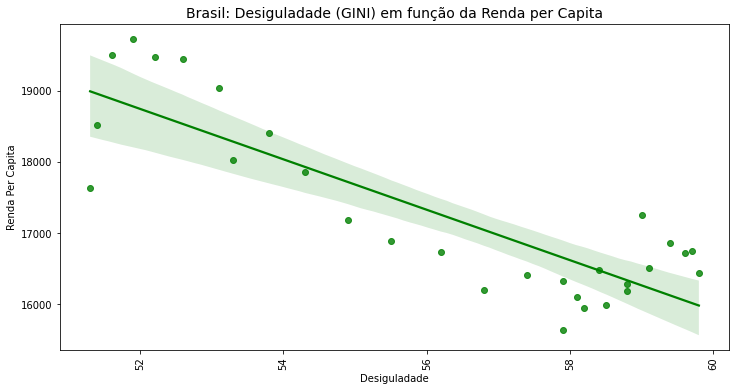

In [393]:
plt.figure(figsize=(12,6))


sns.regplot(x='gini_index', y='gpd_per_capita', data=df_indices_br, color='g')


plt.ylabel("Renda Per Capita")
plt.xlabel("Desiguladade")

plt.title('Brasil: Desiguladade (GINI) em função da Renda per Capita', 
          fontsize=14)
plt.xticks(rotation=90)
plt.show()

### E a como a Renda Per Capita foi relacionada com a Educação?


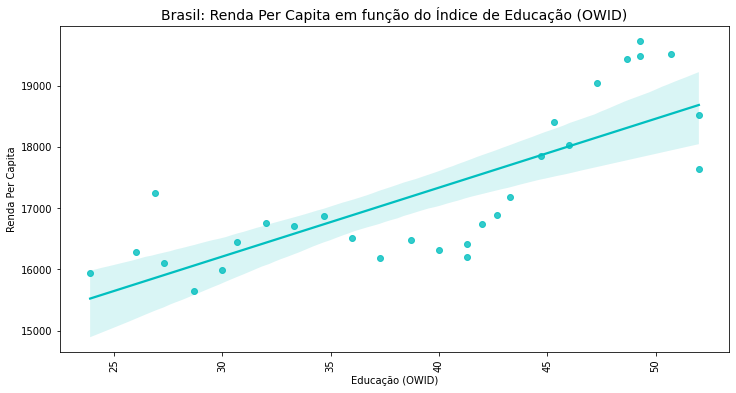

In [394]:
plt.figure(figsize=(12,6))

sns.regplot(x='owid_education_index', y='gpd_per_capita', data=df_indices_br, 
            color='c')


plt.ylabel("Renda Per Capita")
plt.xlabel("Educação (OWID)")

plt.title('Brasil: Renda Per Capita em função do Índice de Educação (OWID)', 
          fontsize=14)
plt.xticks(rotation=90)
plt.show()


## Conclusões

> A respeito dos dados apresentados, foi possível concluir que a Educação teve um aumento, de modo que a Desiguladade diminuiu. 

> Em relação à Renda per Capita, houve aumento, porém nos últimos anos a mesma teve uma queda bem acentuada. 

> A Renda Per Capita teve um crescimento positivamente correlacionado com a melhora na Educação.

> O aumento da Renda Per Capita e da Educação estiveram correlacionados linearmente com a queda da Desigualdade; mas isso não siginifica que existe uma relação de causa e efeito.

> O indicador que teve uma maior variação ao longo dos anos foi a Renda Per Capita, com um já citado aumento.

> Já o indicador que menos variou, ou seja, que se manteve mais próximo de uma média foi a Concentração de Renda dos 10% mais ricos, indicando que os 10% mais ricos não tiveram grandes variações em suas rendas concentradas.

> Apesar da queda da Desiguladade, cerca de 57% da Renda do pais esta concentrada entre os 10% mais ricos.

